<a href="https://colab.research.google.com/github/merwan-bekkouche/tp-ia-embarqu-e/blob/main/TP1_intro_couleurs_motion_Bekkouche_Arar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1: Introduction to Basic Concepts of Image Processing: Color Space, Contours, Motion

Quelques liens utiles :

Image processing library OpenCV: [texte du lien](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
Manipulation of NumPy-type data structures (vectors, matrices): [texte du lien](https://numpy.org/doc/stable/user/absolute_beginners.html)

!!! For the report, don't forget to include the equations of color transformations used in this course (implemented in OpenCV functions)




# Partie 1 : Image and color space exploration



In [1]:
# First, we import the OpenCV image processing library (we'll learn it "on the fly")
# tutorial page: https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html
# we import the numpy package because images are represented as "numpy arrays" and other packages that are useful for visualization
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import imutils
import matplotlib
from matplotlib import pyplot as plt


In [2]:
# we can read images from our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


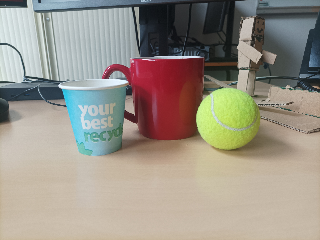

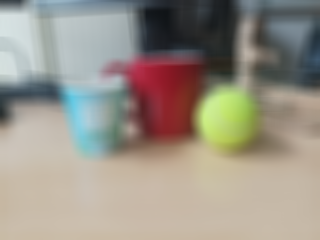

In [3]:
# We're going to read our test images
img = cv.imread('/content/drive/MyDrive/SE-5104A/tp/3.jpg')
# and visualize it - after resizing it
img_r = cv.resize(img,[320,240],interpolation = cv.INTER_LINEAR)
# we can also use Gaussian convolution smoothing to remove some of the noise
img_rb = cv.blur (img_r,[15,15])
cv2_imshow(img_r)
cv2_imshow(img_rb)
#k = cv.waitKey(0)

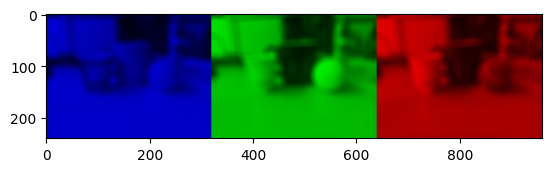

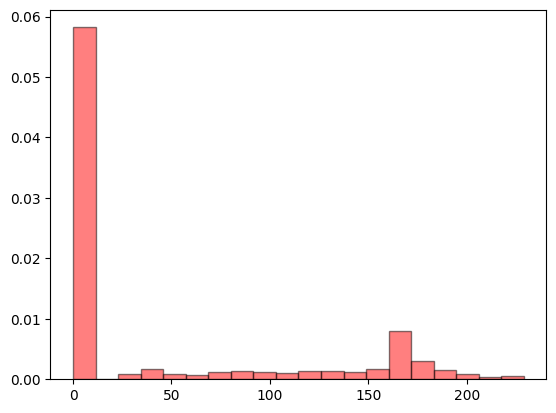

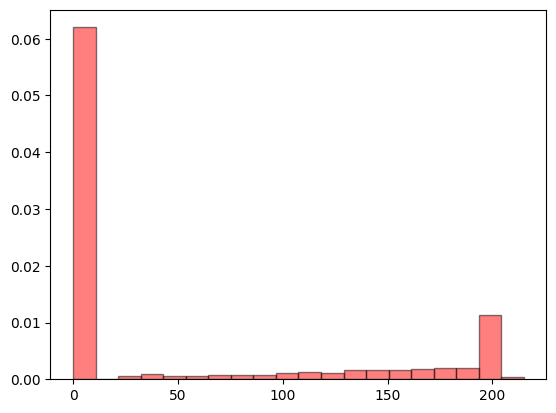

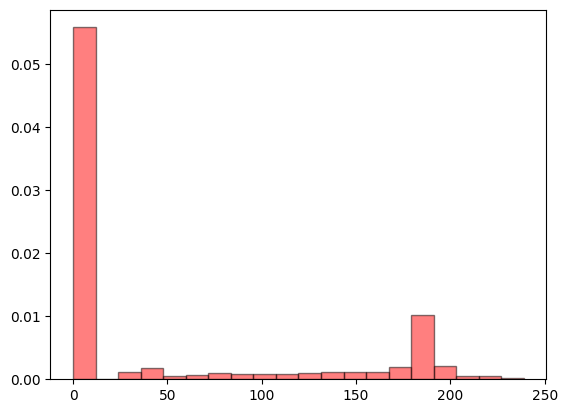

In [4]:
# let's take a close look at the properties of the image

# To display each color channel, we need to separate them for display
# we will also display the histogram of each channel
array_B = img_rb.copy()
array_B[:,:,(1,2)] = 0
# green
array_G = img_rb.copy()
array_G[:,:,(0,2)] = 0
# Blue
array_R = img_rb.copy()
array_R[:,:,(0,1)] = 0

array_RGB = np.concatenate((array_R, array_G, array_B), axis=1)
plt.imshow(array_RGB)
plt.show()

# for example, the histogram of the blue channel
plt.hist(array_B.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()

# for example, the histogram of the red channel
plt.hist(array_R.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()

# for example, the histogram of the green channel
plt.hist(array_G.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()

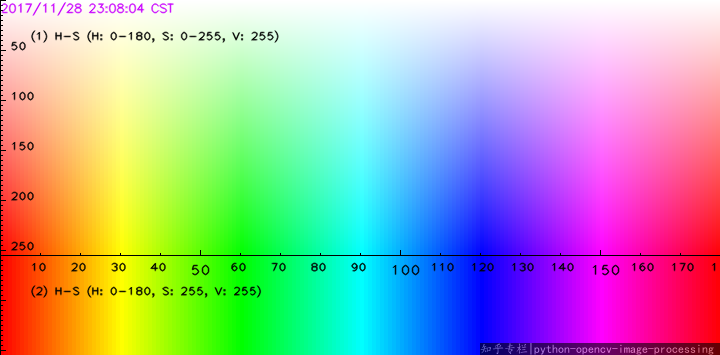

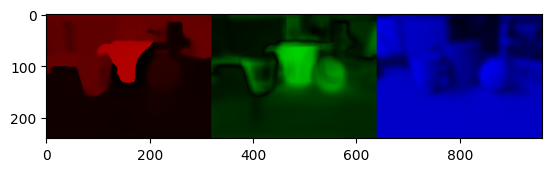

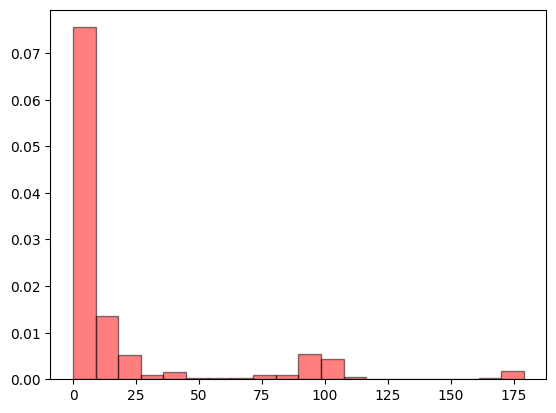

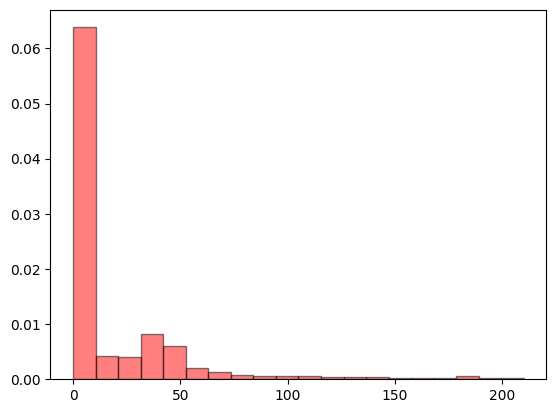

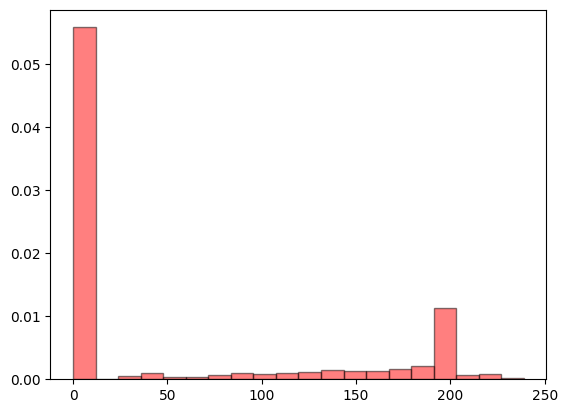

In [5]:
# let's take a close look at the properties of the image

# To display each color channel, we need to separate them for display
# we will also display the histogram of each channel
# Convert BGR to HSV
hsv = cv.cvtColor(img_rb, cv.COLOR_BGR2HSV)


array_h = hsv.copy()
array_h[:,:,(1,2)] = 0

array_s = hsv.copy()
array_s[:,:,(0,2)] = 0

array_v = hsv.copy()
array_v[:,:,(0,1)] = 0

array_HSV = np.concatenate((array_h, array_s, array_v), axis=1)
plt.imshow(array_HSV)
plt.show()

# # for example, the histogram of the h channel
plt.hist(array_h.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()

# # for example, the histogram of the s channel
plt.hist(array_s.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()


# # for example, the histogram of the v channel
plt.hist(array_v.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()


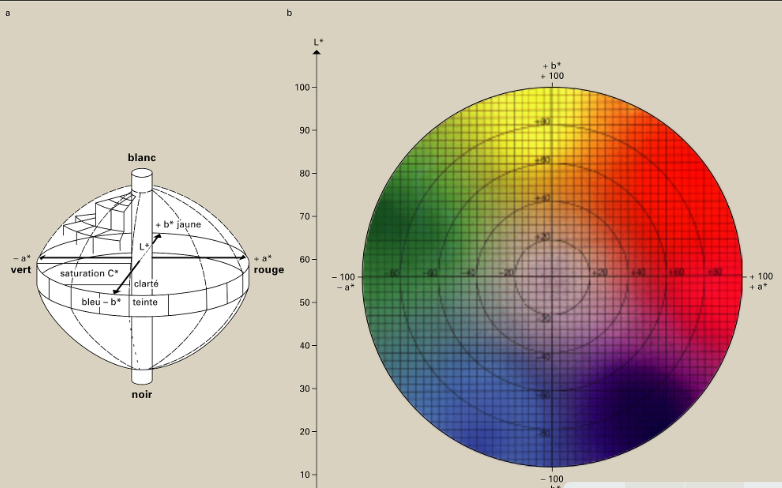

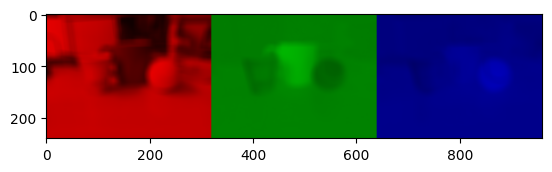

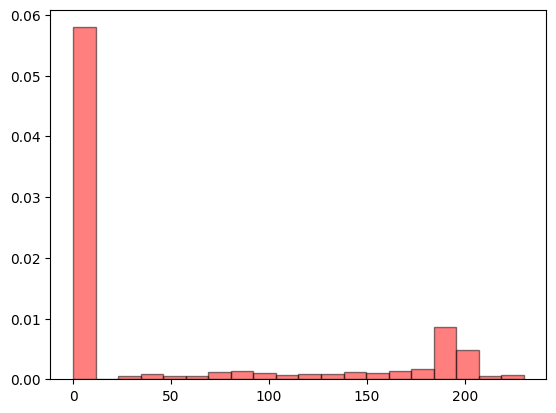

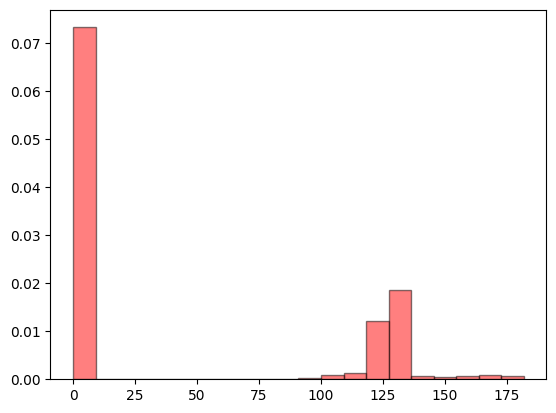

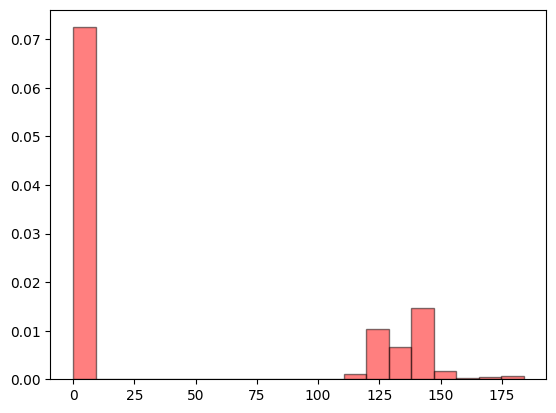

In [6]:
# testons encore un autre espace LAB, par exemple
# Convert BGR to HSV
lab = cv.cvtColor(img_rb, cv.COLOR_BGR2LAB)
# l
array_l = lab.copy()
array_l[:,:,(1,2)] = 0
# a
array_a = lab.copy()
array_a[:,:,(0,2)] = 0
# b
array_b = lab.copy()
array_b[:,:,(0,1)] = 0

array_LAB = np.concatenate((array_l, array_a, array_b), axis=1)
plt.imshow(array_LAB)
plt.show()


# # for example, the histogram of the l channel
plt.hist(array_l.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()

## for example, the histogram of the a channel
#  a*  :  green → red axes ;
plt.hist(array_a.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()


# # for example, the histogram of the b channel
#b*  :  bleu → jaune axes
plt.hist(array_b.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()


# Part 1 : color-based object segmentation

For instance, i HSV space


# **And how to detect an object? Here's the basic example in HSV. Try modifying this example for different objects, in different color spaces.**


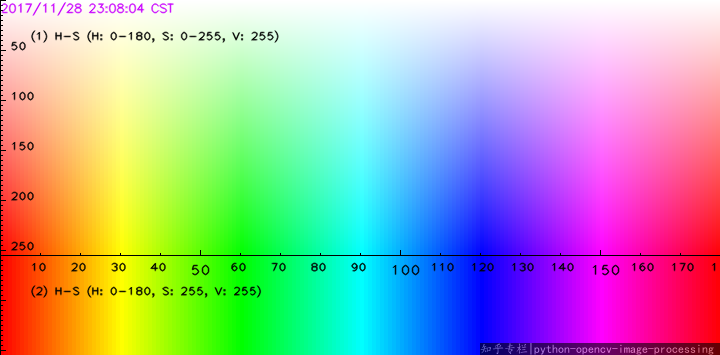

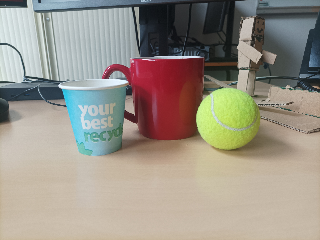

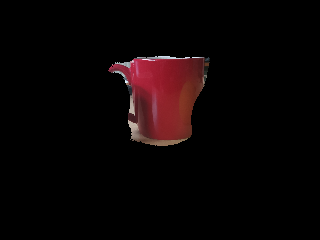

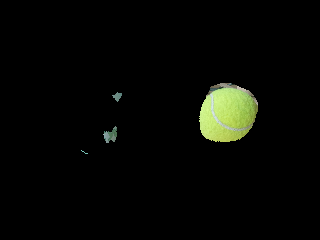

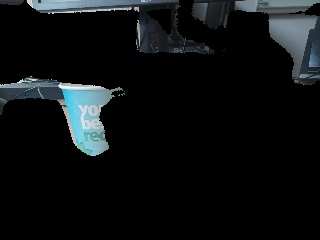

In [14]:
# 1. Plage pour le rouge
lower_red1 = np.array([0, 40, 40])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 40, 40])
upper_red2 = np.array([180, 255, 255])

mask_red1 = cv.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv.inRange(hsv, lower_red2, upper_red2)
mask_rouge = mask_red1 + mask_red2
res_rouge = cv.bitwise_and(img_r, img_r, mask=mask_rouge)

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])
mask_vert = cv.inRange(hsv, lower_green, upper_green)
res_vert = cv.bitwise_and(img_r, img_r, mask=mask_vert)


lower_blue = np.array([85, 30, 30])
upper_blue = np.array([130, 255, 255])

mask_bleu = cv.inRange(hsv, lower_blue, upper_blue)
res_bleu = cv.bitwise_and(img_r, img_r, mask=mask_bleu)

# Visualisation
cv2_imshow(img_r)
cv2_imshow(res_rouge)
cv2_imshow(res_vert)
cv2_imshow(res_bleu)

# to remove small objects related to remaining noise, we can use a non-linear operator - morphological opening


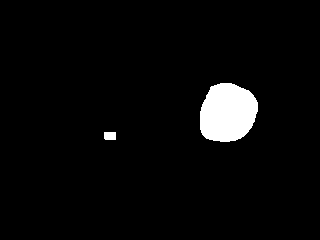

In [13]:
kernel = np.ones((7,7),np.uint8) #we define the size of the filter
open = cv.morphologyEx(mask_vert, cv.MORPH_OPEN, kernel)
cv2_imshow(open)

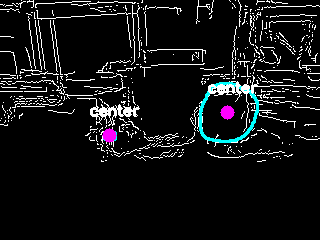

In [12]:
# and we draw an enclosing circle
cnts = cv.findContours(open.copy(), cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
# take the first contour
cnts = imutils.grab_contours(cnts)

# We can display the result superimposed on the contours of the objects, for example
# https://learnopencv.com/edge-detection-using-opencv/
src_gray = cv.cvtColor(img_rb, cv.COLOR_BGR2GRAY)
edges = cv.Canny(image=src_gray, threshold1=10, threshold2=30) # Canny Edge Detection

backtorgb = cv.cvtColor(edges,cv.COLOR_GRAY2RGB)
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv.drawContours(backtorgb, [c], -1, (255, 255, 0), 2)
	cv.circle(backtorgb, (cX, cY), 7, (255, 0, 255), -1)
	cv.putText(backtorgb, "center", (cX - 20, cY - 20),
	cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image

cv2_imshow(backtorgb)


Results checking

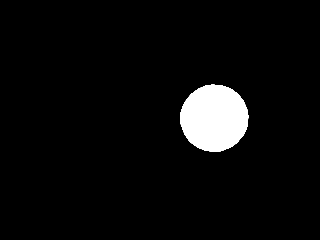

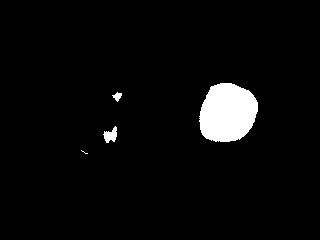

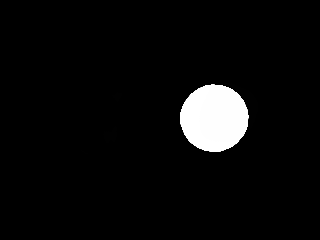

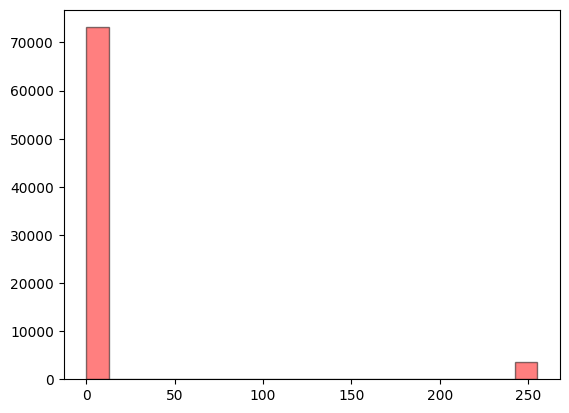

4359


In [11]:
img_ref = cv.imread('/content/drive/MyDrive/SE-5104A/tp/1_refrence.jpg')
img_ref = cv.resize(img_ref,[320,240],interpolation = cv.INTER_LINEAR)
ref_gray = cv.cvtColor(img_ref, cv.COLOR_BGR2GRAY)
mask_vert = mask_vert*255
cv2_imshow(ref_gray)
cv2_imshow(mask_vert)

ref_diff = cv.absdiff(ref_gray,(mask_vert*255))
cv2_imshow(ref_diff)

plt.hist(ref_diff.flatten(), bins = 20, density = False , alpha = .5 , edgecolor = 'black', color = 'red')
plt.show()
numberOfPixelsInMask = cv.countNonZero(ref_diff)
print(numberOfPixelsInMask)

It is possible to use recall and precision metrics [https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel]